# Data-Science - was können wir in einer großen Datenmenge erkennen? #
Hier habe ich einmal ein einfaches Beispiel entwickelt anhand dem ich versuchen werde einfache Verfahren aus dem Bereich _Data Science_ zu zeigen. Wie immer kann ich nur an der Oberfläche kratzen, da ich selber nur aus OpenSAP Kursen und diversen Büchern das Thema kennegelernt habe und vieles für mich daher "nur Theorie" ist. Und ob das nun wirklich _Data Science_ ist, das weiß ich auch nicht. Auf jeden Fall werde ich euch aber ein paar Methoden der python Bibliothek __[pandas](https://de.wikipedia.org/wiki/Pandas_(Software))__ vorstellen, die vornehmlich in _Data Science_ Projekten verwendet wird. Einen kurzen Überblick, wie man __pandas__ verwendet, gibts auch [hier](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

Datenbasis ist eine Anwendung in der ich Ladevorgänge an diversen Ladestationen für Elektroautos simuliere (sorry, es geht wieder um ein Thema, das viele noch für irrelevant halten). Die Anwendung hatte ich ursprünglich einmal entwickelt, um die einzelnen Schritte eines Ladevorganges in einer Blockchain abzubilden. Das hat auch funktioniert, nur habe ich leider keinen Zugriff mehr auf eine Blockchain (im SAP-Trial nicht mehr verfügbar. Dann hatte ich sie bei AWS eingerichtet. Dort ist sie mir aber zu teuer. Und sie auf einem privaten Server zu installieren ohne Zugriff von außen macht nicht viel Sinn, denn daß es funktioniert habe ich gesehen). <br>
Bei der Simulation unterscheide ich natürlich unterschiedliche Ladeverhalten. Diese werde ich versuchen, in den Daten wiederzufinden. Ich weiß natürlich wonach ich suche - ihr aber nicht. Vielleicht ist es ja ein spannendes Thema für euch? 

#### Es geht los: ####
Wir brauchen erst einmal folgende Bibliotheken:
+ ```pandas``` stellt Methoden bereit um Daten tabellenweise zu analysieren und Anpassungen durchzuführen. Wesentliche Konzepte sind dabei "series", die (Daten-)Spalten beschreiben und "dataframes", die eine Reihe von "series" in Form einer Tabelle entsprechen
+ ```numpy``` ist die Bibliothek für numerische Aufgaben in python

In [1]:
try:
    import pandas as pd
    import numpy as np
except:
    import micropip
    await micropip.install("scikit-learn")
    await micropip.install("scikit-learn")




### Einlesen der CSV-Datei: ###
Wir können pandas direkt die URL mitgeben über die wir die Daten bekommen. Auf dem Webserver führe ich unter der angegebenen URL direkt die Abfragen auf der mySQL Datenbank durch und starte den Download der CSV-Datei. __Achtung:__ es wird keine lokale Kopie der heruntergeladenen Datei gespeichert und verarbeitet!
Wenn ihr alternativ den Downwload der Datei über diesen Link durchführt
https://myprivatedemoaccount.eu.pythonanywhere.com/DSdownload
dann könnt ihr diese Datei DSdata.csv auch in demselben Ordner ablegen, wo sich dieses Notebook befindet und es wird dann die lokale Kopie eingelesen. 

In [2]:
# prüfen, ob eine Datei DSdata.csv existiert. 
# Wenn, dann zeigt URL auf diese Datei, 
# andernfalls auf die Quelle im WWW
from pathlib import Path
myFile = Path('DSdata.csv')
if myFile.is_file():
    URL = 'DSdata.csv'
    print('Die lokale Datei existiert.')
else:
    URL = 'https://myprivatedemoaccount.eu.pythonanywhere.com/DSdownload'
    print('Der Datenbestand wird heruntergeladen.')

Der Datenbestand wird heruntergeladen.


Wir haben soeben die Quelle der Datei festgestellt und in ```URL``` vermerkt. Jetzt wird von dieser Quelle die Datei in das Dataframe ```df``` eingelesen.
Die Datei enthält keine Kopfzeilen. Daher geben wir jeder Spalte einen Namen und parsen die Datumsfelder. Außerden setzen wir für bestimmmte Spalten explizit die Datentypen. Im wesentlichen deshalb, damit keine Felder wie Zählernummer oder ID für Berechnungen herangezogen werden, weil das für diese Felder einfach keinen Sinn machen würde.

In [3]:
df = pd.read_csv(URL, header=None,
                 names=['ID', 'EVSEID', 'ZaehlerNr', 'Beginn', 'EndeLadung', 'EndeVorgang','ZStandBeginn','ZStandEnde','Adresse','LSTyp','ZTyp','geeichtBis','Einbaudatum'],
                 parse_dates=['Beginn','EndeLadung','EndeVorgang'],
                 dtype={'ID': str, 'EVSEID': str, 'ZaehlerNr': str, 'geeichtBis': int})

und das sind die Spalten mit ihren Datentypen, die in der eingelesenen Datei erkannt werden:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            4640 non-null   object        
 1   EVSEID        4640 non-null   object        
 2   ZaehlerNr     4640 non-null   object        
 3   Beginn        4640 non-null   datetime64[ns]
 4   EndeLadung    4640 non-null   datetime64[ns]
 5   EndeVorgang   4640 non-null   datetime64[ns]
 6   ZStandBeginn  4640 non-null   float64       
 7   ZStandEnde    4640 non-null   float64       
 8   Adresse       4640 non-null   object        
 9   LSTyp         4640 non-null   object        
 10  ZTyp          4640 non-null   object        
 11  geeichtBis    4640 non-null   int64         
 12  Einbaudatum   4640 non-null   object        
dtypes: datetime64[ns](3), float64(2), int64(1), object(7)
memory usage: 471.4+ KB


Die Datei enthält alle Spalten aus den Tabellen der Anwendung. Die Spalten bedeuten im einzelnen:
<table>
    <tr><td><b>ID</b></td><td> eine eindeutige ID des Ladevorganges </td></tr>
    <tr><td><b>EVSEID</b></td><td> das ist die eindeutige Kennzeichnung der Ladesäule bzw. des Ladepunktes </td></tr>
    <tr><td><b>ZaehlerNr</b></td><td> die Serialnummer des eingebauten Zählers </td></tr>
    <tr><td><b>Beginn</b></td><td>der Zeitstempel ab dem die Verbindung zwischen Ladesäule und Auto hergestellt wurde (also die Säule belegt ist)</td></tr>
    <tr><td><b>EndeLadung</b></td><td>der Zeitstempel, an dem der Ladevorgang vom Auto aus beendet wurde (weil bspw. der Akku "voll" war, oder der Ladevorgang vom Nutzer beendet wurde)</td></tr>
    <tr><td><b>EndeVorgang</b></td><td>der Zeitstempel, an dem das Auto von der Ladesäule getrennt wurde (also die Säule wieder "frei" ist)</td></tr>
    <tr><td><b>ZStandBeginn</b></td><td>der Zählerstand zum Beginn des Ladevorganges</td></tr>
    <tr><td><b>ZStandEnde</b></td><td>der Zählerstand am Ende des Ladevorganges</td></tr>
    <tr><td><b>Adresse</b></td><td>Adresse des Standortes der Ladesäule</td></tr>
    <tr><td><b>LSTyp</b></td><td>der Typ der Ladesäule (die zugeordneten Typen sind völlig fiktiv)</td></tr>
    <tr><td><b>ZTyp</b></td><td>der Typ des eingebauten Zählers (die zugeordneten Typen sind ebenfalls völlig fiktiv)</td></tr>
    <tr><td><b>geeichtBis</b></td><td>das Jahr des Ablaufs der Eichgültigkeit des eingebauten Zähler</td></tr>
<tr><td><b>Einbaudatum</b></td><td>Einbaudatum des Zählers</td></tr>
</table>

und das sind die ersten Datensätze der eingelesenen Datei:

In [5]:
df.head()

,ID,EVSEID,ZaehlerNr,Beginn,EndeLadung,EndeVorgang,ZStandBeginn,ZStandEnde,Adresse,LSTyp,ZTyp,geeichtBis,Einbaudatum
0,10039421,DE*ENM*E102285*1,1540717894,2021-11-08 12:17:09,2021-11-08 14:21:25,2021-11-08 15:20:25,262.78,285.56,Bahnhofstrasse 2,H9-2,ZT02,2028,2020-12-21 00:00:00
1,10046329,DE*ENM*E102116*2,4934954503,2022-03-02 08:37:53,2022-03-02 12:49:21,2022-03-02 13:54:21,6536.23,6582.34,Schulstrasse 9,LS1-2,AB012A,2027,2019-12-16 00:00:00
2,10064245,DE*ENM*E102335*1,4387351965,2021-12-25 11:29:28,2021-12-25 11:59:55,2021-12-25 12:01:55,0.00,46.62,Bahnhofstrasse 43,HPC15,AB012A,2028,2020-05-08 00:00:00
3,10096212,DE*ENM*E102349*1,1403447632,2022-01-28 08:18:36,2022-01-28 14:27:33,2022-01-28 15:14:33,3247.62,3315.26,Am Schwimmbad 3,EBox-32/3,AB009A,2028,2020-12-28 00:00:00
4,10115005,DE*ENM*E102349*2,2908203042,2021-11-11 09:31:50,2021-11-11 10:23:45,2021-11-11 10:40:45,352.19,361.71,Am Schwimmbad 3,EBox-32/3,AB009A,2028,2020-12-28 00:00:00


die Spalte *geeicht bis* (die Jahreszahl bis wann der eingebaute Zähler geeicht ist) wird uns bei den weiteren Analysen nicht interessieren und wir können die ganze Spalte (axis=1) aus der Tabelle löschen:

In [6]:
df = df.drop('geeichtBis',axis=1)

Wir können die Tabelle auch nach beliebigen Spalten auf- oder absteigend sortieren. Wir müssen explizit angeben, dass wir die eingelesene Tabelle sortiert haben und in der neuen Reihenfolge weiterverarbeiten möchten (inplace=True), andernfalls wird sie nur sortiert angezeigt oder wir müssten sie in einen neuen Dataframe kopieren.

In [7]:
df.sort_values('Beginn',ascending=True,inplace=True)

Vielleicht haben wir schon bemerkt, dass wir keine Mengen sondern nur die Zählerstände zu Beginn und Ende des Ladevorganges haben. Die geladenen Mengen sind für die weiteren Auswertungen aber bestimmt interessanter: also ermitteln wir die Mengen in einer neuen Spalte, die wir "Menge" nennen, und berechnen den Wert für jede Zeile anhand der Zählerstandsdifferenzen:

In [8]:
df['Menge'] = df['ZStandEnde'] - df['ZStandBeginn']

Lassen wir uns jetzt einmal eine (deskriptive) Statistik über die numerischen Spalten der Tabelle ausgeben. <br>
Folgende Werte werden dabei automatisch ermittelt und ausgegeben:
<table>
    <tr><td><b>count</b></td><td>die Anzahl an Datenpunkten</td></tr>
    <tr><td><b>mean</b></td><td>der Mittelwert</td></tr>
    <tr><td><b>std</b></td><td>die Standardabweichung</td></tr>
    <tr><td><b>min</b></td><td>der kleinste Wert</td></tr>
    <tr><td><b>25%</b></td><td>das 25%-Perzentil (25% der Werte sind kleiner als dieser Wert) (oder auch das Q1 oder "unterste Quartil")</td></tr>
    <tr><td><b>50%</b></td><td>das 50%-Perzentil (das 50%-Perzentil ist gleich dem Median) (oder auch Q2 oder das "mittlere Quartil")</td></tr>
    <tr><td><b>75%</b></td><td>das 75%-Perzentil (75% der Werte sind kleiner als dieser Wert) (oder auch Q3 oder das "oberste Quartil")</td></tr>
    <tr><td><b>max</b></td><td>der Maximalwert </td></tr>
</table>

Wir werden sehen, dass sowohl ZStandBeginn, ZStandEnde und Menge dargestellt werden. Das sind alle Felder mit numerischem Inhalt. Für die Zählerstände sind die Statistiken nicht so sehr aussgefähig, aber wir sehen, dass die Menge jetzt als weitere Spalte im Dataframe enthalten ist. Für die Mengen erhalten wir auch plausisble Werte, denn das sind Größenordnungen, die meine Anwendung verwendet.

In [9]:
df.describe()

,ZStandBeginn,ZStandEnde,Menge
count,4640.000000,4640.000000,4640.000000
mean,2611.053231,2640.932696,29.879466
std,2494.945075,2496.335649,16.510882
min,0.000000,8.670000,3.050000
25%,366.715000,385.045000,15.730000
50%,1806.615000,1838.885000,28.425000
75%,4514.380000,4547.570000,42.542500
max,9119.750000,9134.360000,71.160000


__Exkurs:__ <br>Wir können auch einen neuen Dataframe erstellen welcher alle Zeilen zu einer angegebenen EVSEID enthält.

Wir sehen am Ende der Ausgabe, dass der Dataframe weniger Zeilen enthält: es sind nur noch so viele, wie es Ladevorgänge an diesem Ladepunkt gibt.

In [10]:
newdf = df.loc[df['EVSEID'] == 'DE*ENM*E102335*1']
newdf

,ID,EVSEID,ZaehlerNr,Beginn,EndeLadung,EndeVorgang,ZStandBeginn,ZStandEnde,Adresse,LSTyp,ZTyp,Einbaudatum,Menge
1675,42642412,DE*ENM*E102335*1,4387351965,2021-11-01 01:38:00,2021-11-01 01:56:59,2021-11-01 01:58:59,0.0,18.06,Bahnhofstrasse 43,HPC15,AB012A,2020-05-08 00:00:00,18.06
442,18569747,DE*ENM*E102335*1,4387351965,2021-11-01 08:46:59,2021-11-01 09:35:15,2021-11-01 09:37:15,0.0,41.37,Bahnhofstrasse 43,HPC15,AB012A,2020-05-08 00:00:00,41.37
606,21603712,DE*ENM*E102335*1,4387351965,2021-11-01 15:24:15,2021-11-01 15:36:19,2021-11-01 15:37:19,0.0,15.90,Bahnhofstrasse 43,HPC15,AB012A,2020-05-08 00:00:00,15.90
4077,88660328,DE*ENM*E102335*1,4387351965,2021-11-01 20:22:19,2021-11-01 20:55:13,2021-11-01 20:55:13,0.0,34.77,Bahnhofstrasse 43,HPC15,AB012A,2020-05-08 00:00:00,34.77
3650,80715981,DE*ENM*E102335*1,4387351965,2021-11-02 04:17:13,2021-11-02 04:34:53,2021-11-02 04:34:53,0.0,23.18,Bahnhofstrasse 43,HPC15,AB012A,2020-05-08 00:00:00,23.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,71668138,DE*ENM*E102335*1,4387351965,2022-04-09 07:48:08,2022-04-09 08:12:12,2022-04-09 08:13:12,0.0,27.60,Bahnhofstrasse 43,HPC15,AB012A,2020-05-08 00:00:00,27.60
3234,72919789,DE*ENM*E102335*1,4387351965,2022-04-09 14:28:12,2022-04-09 14:41:21,2022-04-09 14:43:21,0.0,21.51,Bahnhofstrasse 43,HPC15,AB012A,2020-05-08 00:00:00,21.51
3722,81749322,DE*ENM*E102335*1,4387351965,2022-04-09 21:18:21,2022-04-09 22:02:27,2022-04-09 22:03:27,0.0,58.83,Bahnhofstrasse 43,HPC15,AB012A,2020-05-08 00:00:00,58.83
45,10782025,DE*ENM*E102335*1,4387351965,2022-04-10 03:20:27,2022-04-10 03:51:53,2022-04-10 03:52:53,0.0,43.63,Bahnhofstrasse 43,HPC15,AB012A,2020-05-08 00:00:00,43.63


___...und weiter im Text__<br>Uns interessiert jetzt auch noch wie lange die einzelnen Ladevorgänge gedauert haben. Also definieren wir eine weitere Spalte, die wir mit den Differenzen der Zeitstempel füllen.

In [11]:
df['Dauer'] = df['EndeLadung'] - df['Beginn']

In [12]:
df.describe()

,ZStandBeginn,ZStandEnde,Menge,Dauer
count,4640.000000,4640.000000,4640.000000,4640
mean,2611.053231,2640.932696,29.879466,0 days 02:14:32.763362068
std,2494.945075,2496.335649,16.510882,0 days 01:38:26.771649167
min,0.000000,8.670000,3.050000,0 days 00:09:59
25%,366.715000,385.045000,15.730000,0 days 00:48:30.250000
50%,1806.615000,1838.885000,28.425000,0 days 01:49:44
75%,4514.380000,4547.570000,42.542500,0 days 03:21:37
max,9119.750000,9134.360000,71.160000,0 days 09:17:44


Zusätzlich zur Dauer des Ladevorganges (also der Differenz von _EndeLadung zu Beginn_) ist auch noch interessant, wie lange die einzelnen Ladesäulen belegt waren. Also fügen wir noch eine Spalte mit der Differenz _EndeVorgang zu Beginn_ an. Die Daten scheinen ebenfalls plausibel zu sein, da die Dauer der Belegung nicht kürzer sein kann, als die Dauer der Ladung:

In [13]:
df['DauerBelegt'] = df['EndeVorgang'] - df['Beginn']
df.describe()

,ZStandBeginn,ZStandEnde,Menge,Dauer,DauerBelegt
count,4640.000000,4640.000000,4640.000000,4640,4640
mean,2611.053231,2640.932696,29.879466,0 days 02:14:32.763362068,0 days 03:41:35.906465517
std,2494.945075,2496.335649,16.510882,0 days 01:38:26.771649167,0 days 03:07:45.156317313
min,0.000000,8.670000,3.050000,0 days 00:09:59,0 days 00:09:59
25%,366.715000,385.045000,15.730000,0 days 00:48:30.250000,0 days 01:09:39.250000
50%,1806.615000,1838.885000,28.425000,0 days 01:49:44,0 days 03:05:04.500000
75%,4514.380000,4547.570000,42.542500,0 days 03:21:37,0 days 05:04:08.750000
max,9119.750000,9134.360000,71.160000,0 days 09:17:44,0 days 14:46:02


Wir können auch die Analyse auf die Spalte 'Menge' einschränken. 

In [14]:
df['Menge'].describe()

count    4640.000000
mean       29.879466
std        16.510882
min         3.050000
25%        15.730000
50%        28.425000
75%        42.542500
max        71.160000
Name: Menge, dtype: float64

Interessanter ist vielleicht die Statistik pro Ladepunkt? Dazu gruppieren wir anhand der EVSEID. Bei den Zählerständen fällt ein Ladepunkt auf, bei dem der Anfangszählerstand immer 0 ist. An diesem Ladepunkt haben auch auffallend mehr Ladevorgänge stattgefunden, als bei den anderen.

In [15]:
df.groupby(by=['EVSEID']).describe()

ZStandBeginn                                               \
                        count         mean          std     min        25%   
EVSEID                                                                       
DE*ENM*E102048*1        234.0  4190.534829  2748.844991   10.73  1600.3650   
DE*ENM*E102082*1         66.0   847.719697   509.521472    4.53   389.0925   
DE*ENM*E102082*2         65.0   851.806462   533.270986    3.70   365.2600   
DE*ENM*E102116*1        229.0  3987.126070  2585.201774    1.69  1579.1200   
DE*ENM*E102116*2        245.0  4192.697551  2677.446735   10.51  1728.5600   
DE*ENM*E102171*1        232.0  4195.039784  2667.954218   92.64  1668.2650   
DE*ENM*E102211*1        253.0  4237.393834  2805.968950    5.40  1604.3400   
DE*ENM*E102234*1         64.0  1657.587188   501.304569  902.45  1217.0125   
DE*ENM*E102251*1        288.0  2721.897222  1867.715967   27.06   919.7125   
DE*ENM*E102285*1        243.0  4092.503580  2731.665704    4.29  1584.4850   
DE*ENM*E102294*1         68.0   845.069706   516.199387    1.35   393.9075   
DE*ENM*E102324*1         65.0   838.232000   522.587404   10.53   364.4700   
DE*ENM*E102335*1        815.0     0.000000     0.000000    0.00     0.0000   
DE*ENM*E102349*1        294.0  2800.018912  1792.256725    5.08  1184.7300   
DE*ENM*E102349*2        306.0  2954.385131  1920.961923    6.19  1156.6100   
DE*ENM*E102476*1         66.0   830.141515   525.161556    1.31   357.8125   
DE*ENM*E102492*1        292.0  2508.085959  1701.122609    6.35   926.5525   
DE*ENM*E102559*1        282.0  2595.549610  1798.976071    1.17   927.7900   
DE*ENM*E102559*2        288.0  2671.932500  1799.406220    4.09   988.4800   
DE*ENM*E102873*1        245.0  4185.847796  2740.673984    6.47  1645.6800   

                                               ZStandEnde               ...  \
                       50%        75%      max      count         mean  ...   
EVSEID                                                                  ...   
DE*ENM*E102048*1  4095.755  6680.6200  8888.76      234.0  4227.910085  ...   
DE*ENM*E102082*1   837.000  1297.7225  1656.98       66.0   872.635455  ...   
DE*ENM*E102082*2   846.130  1350.5600  1730.39       65.0   877.987692  ...   
DE*ENM*E102116*1  3846.350  6280.9500  8426.78      229.0  4023.323362  ...   
DE*ENM*E102116*2  4133.540  6626.0100  8651.25      245.0  4227.436286  ...   
DE*ENM*E102171*1  4012.075  6622.2375  8726.10      232.0  4231.605819  ...   
DE*ENM*E102211*1  4023.940  6730.1900  9119.75      253.0  4272.770672  ...   
DE*ENM*E102234*1  1606.635  2086.3325  2551.80       64.0  1683.194531  ...   
DE*ENM*E102251*1  2535.230  4447.9775  5928.00      288.0  2742.116597  ...   
DE*ENM*E102285*1  3806.590  6591.2350  8815.05      243.0  4128.192510  ...   
DE*ENM*E102294*1   847.515  1309.0575  1719.98       68.0   870.263529  ...   
DE*ENM*E102324*1   835.140  1313.9900  1705.46       65.0   863.938615  ...   
DE*ENM*E102335*1     0.000     0.0000     0.00      815.0    41.205571  ...   
DE*ENM*E102349*1  2700.990  4419.4050  5823.98      294.0  2819.466531  ...   
DE*ENM*E102349*2  2789.580  4807.2875  6241.06      306.0  2974.387908  ...   
DE*ENM*E102476*1   819.505  1271.6950  1693.13       66.0   855.630303  ...   
DE*ENM*E102492*1  2304.850  3965.1300  5655.45      292.0  2527.092603  ...   
DE*ENM*E102559*1  2343.100  4258.6450  5755.33      282.0  2615.583475  ...   
DE*ENM*E102559*2  2515.720  4369.5575  5845.11      288.0  2691.837500  ...   
DE*ENM*E102873*1  4016.910  6731.1400  8903.79      245.0  4221.606612  ...   

                                   Dauer                  DauerBelegt  \
                                     75%              max       count   
EVSEID                                                                  
DE*ENM*E102048*1  0 days 04:27:56.750000  0 days 07:27:52         234   
DE*ENM*E102082*1  0 days 03:02:08.750000  0 days 04:29:30          66   
DE*ENM*E102082*2         0 days 03:09:4

Die Ausgabe ist ziemlich unübersichtich und unvollständig, da nicht alle Spalten augegeben werden. Daher können wir die Ausgabe auch auf bestimmte Spalten eingrenzen. Dazu betrachten wir nur die EVSEID (über die wir gruppieren wollen) und die Menge, weil uns nur die Statistik zu dieser Spalte interessiert:

In [17]:
df[{'EVSEID','Menge'}].groupby(by=['EVSEID']).describe()

Menge                                                \
                  count       mean        std    min      25%     50%   
EVSEID                                                                  
DE*ENM*E102048*1  234.0  37.375256  12.551965  12.16  27.9475  36.530   
DE*ENM*E102082*1   66.0  24.915758   8.847271   8.46  17.5850  24.970   
DE*ENM*E102082*2   65.0  26.181231  10.666321   7.71  18.6200  29.200   
DE*ENM*E102116*1  229.0  36.197293  12.571813  12.27  26.4100  35.480   
DE*ENM*E102116*2  245.0  34.738735  12.342423  12.96  24.4500  33.920   
DE*ENM*E102171*1  232.0  36.566034  12.795643  12.32  26.4700  36.020   
DE*ENM*E102211*1  253.0  35.376838  12.492308  12.18  25.3300  34.750   
DE*ENM*E102234*1   64.0  25.607344   9.496657  10.46  18.8925  24.945   
DE*ENM*E102251*1  288.0  20.219375  16.064326   3.18   9.1950  14.245   
DE*ENM*E102285*1  243.0  35.688930  13.128105  12.00  24.3150  34.030   
DE*ENM*E102294*1   68.0  25.193824  10.068987   8.59  16.2750  24.575   
DE*ENM*E102324*1   65.0  25.706615   9.561903   8.90  18.3900  24.590   
DE*ENM*E102335*1  815.0  41.205571  14.414314  15.90  29.0800  40.940   
DE*ENM*E102349*1  294.0  19.447619  15.525889   3.05   9.1025  13.660   
DE*ENM*E102349*2  306.0  20.002778  15.555872   3.07   9.5700  14.110   
DE*ENM*E102476*1   66.0  25.488788  10.567003   7.92  16.2975  26.095   
DE*ENM*E102492*1  292.0  19.006644  15.072560   3.20   9.0825  13.845   
DE*ENM*E102559*1  282.0  20.033865  16.478782   3.23   8.7575  13.620   
DE*ENM*E102559*2  288.0  19.905000  16.176184   3.18   8.1100  12.885   
DE*ENM*E102873*1  245.0  35.758816  12.586012  13.47  25.8100  33.200   

                                  
                      75%    max  
EVSEID                            
DE*ENM*E102048*1  47.2450  64.05  
DE*ENM*E102082*1  31.8275  43.84  
DE*ENM*E102082*2  33.7900  45.27  
DE*ENM*E102116*1  45.4800  64.18  
DE*ENM*E102116*2  43.4300  63.50  
DE*ENM*E102171*1  45.9875  63.53  
DE*ENM*E102211*1  45.1000  63.85  
DE*ENM*E102234*1  32.0275  43.49  
DE*ENM*E102251*1  25.8075  70.28  
DE*ENM*E102285*1  46.2800  63.54  
DE*ENM*E102294*1  33.4975  42.87  
DE*ENM*E102324*1  32.5900  44.98  
DE*ENM*E102335*1  52.7700  71.16  
DE*ENM*E102349*1  23.7050  69.84  
DE*ENM*E102349*2  26.1225  70.39  
DE*ENM*E102476*1  34.8975  45.42  
DE*ENM*E102492*1  21.4200  70.53  
DE*ENM*E102559*1  26.1175  70.19  
DE*ENM*E102559*2  30.9000  69.13  
DE*ENM*E102873*1  45.4100  64.14

Pandas bietet auch die Statistik über alle Felder an: bei den nicht numerischen Feldern werden zusätzliche Informationen ausgegegeben. Setzen wir *datetime_is_numeric=True*, dann werden die Zeitwerte als numerische Werte interpretiert. Außerdem finden wir in vielen Felder den Inhalt *NaN*: das ist in Pandas immer der Hinweis, dass das Feld __keinen__ numerischen Inhalt hat (Not-a-Number) und muss oftmals bei Datensätzen, die ausgewertet werden, herausgefiltert und mit sinnvollen Werten ersetzt werden oder die Datenreihen müssen gelöscht werden.

In [18]:
df.describe(include='all',datetime_is_numeric=True)

,ID,EVSEID,ZaehlerNr,Beginn,EndeLadung,EndeVorgang,ZStandBeginn,ZStandEnde,Adresse,LSTyp,ZTyp,Einbaudatum,Menge,Dauer,DauerBelegt
count,4640,4640,4640,4640,4640,4640,4640.000000,4640.000000,4640,4640,4640,4640,4640.000000,4640,4640
unique,4640,20,20,NaN,NaN,NaN,NaN,NaN,14,8,6,14,NaN,NaN,NaN
top,42642412,DE*ENM*E102335*1,4387351965,NaN,NaN,NaN,NaN,NaN,Bahnhofstrasse 43,LS1-2,AB012A,2020-05-08 00:00:00,NaN,NaN,NaN
freq,1,815,815,NaN,NaN,NaN,NaN,NaN,815,1112,1815,815,NaN,NaN,NaN
mean,NaN,NaN,NaN,2022-01-18 01:56:06.609051648,2022-01-18 04:10:39.372413696,2022-01-18 05:37:42.515517184,2611.053231,2640.932696,NaN,NaN,NaN,NaN,29.879466,0 days 02:14:32.763362068,0 days 03:41:35.906465517
min,NaN,NaN,NaN,2021-11-01 01:38:00,2021-11-01 01:56:59,2021-11-01 01:58:59,0.000000,8.670000,NaN,NaN,NaN,NaN,3.050000,0 days 00:09:59,0 days 00:09:59
25%,NaN,NaN,NaN,2021-12-07 09:51:51.249999872,2021-12-07 12:13:08.500000,2021-12-07 13:17:15.249999872,366.715000,385.045000,NaN,NaN,NaN,NaN,15.730000,0 days 00:48:30.250000,0 days 01:09:39.250000
50%,NaN,NaN,NaN,2022-01-17 02:11:26,2022-01-17 03:13:51,2022-01-17 08:38:56.500000,1806.615000,1838.885000,NaN,NaN,NaN,NaN,28.425000,0 days 01:49:44,0 days 03:05:04.500000
75%,NaN,NaN,NaN,2022-02-28 16:25:38.249999872,2022-02-28 19:28:55.249999872,2022-02-28 20:20:11.500000,4514.380000,4547.570000,NaN,NaN,NaN,NaN,42.542500,0 days 03:21:37,0 days 05:04:08.750000
max,NaN,NaN,NaN,2022-04-10 13:45:27,2022-04-10 15:05:07,2022-04-10 15:24:07,9119.750000,9134.360000,NaN,NaN,NaN,NaN,71.160000,0 days 09:17:44,0 days 14:46:02


In einem nächsten Schritt ist sicher interessant zu untersuchen wieviele kWh an den verschiedenen Ladpunkten abgegeben wurde. Dazu aggregieren wir die Mengen über alle EVSEID und erstellen einen neuen Dataframe mit den aggregierten Werten, ermitteln gleichzeitig auch noch den Mittelwert der Lademengen, die Standardverteilunug und auch noch wieviele Ladevorgänge stattgefunden haben (dann brauchen wir es ggf. nicht erneut zu errechnen). Schliesslich erzeugen wir noch neue Spaltenbezeichnungen (um die Spalten einfacher adressieren zu können) und lassen uns den neuen Dataframe anzeigen

In [19]:
df_agg = df.groupby(by='EVSEID').agg({'Menge':['sum','mean','std','min','max','count']}) #lambda x: np.percentile(x,[50])]})
df_agg.columns = df_agg.columns.get_level_values(0)+"_"+df_agg.columns.get_level_values(1)
df_agg

,Menge_sum,Menge_mean,Menge_std,Menge_min,Menge_max,Menge_count
EVSEID,,,,,,
DE*ENM*E102048*1,8745.81,37.375256,12.551965,12.16,64.05,234
DE*ENM*E102082*1,1644.44,24.915758,8.847271,8.46,43.84,66
DE*ENM*E102082*2,1701.78,26.181231,10.666321,7.71,45.27,65
DE*ENM*E102116*1,8289.18,36.197293,12.571813,12.27,64.18,229
DE*ENM*E102116*2,8510.99,34.738735,12.342423,12.96,63.50,245
DE*ENM*E102171*1,8483.32,36.566034,12.795643,12.32,63.53,232
DE*ENM*E102211*1,8950.34,35.376838,12.492308,12.18,63.85,253
DE*ENM*E102234*1,1638.87,25.607344,9.496657,10.46,43.49,64
DE*ENM*E102251*1,5823.18,20.219375,16.064326,3.18,70.28,288


Lassen wir uns noch die Info zum neun Dataframe ausgeben und wir sehen, dass wir tatsächlich nur noch 20 Einträge mit 6 Spalten haben:

In [20]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, DE*ENM*E102048*1 to DE*ENM*E102873*1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Menge_sum    20 non-null     float64
 1   Menge_mean   20 non-null     float64
 2   Menge_std    20 non-null     float64
 3   Menge_min    20 non-null     float64
 4   Menge_max    20 non-null     float64
 5   Menge_count  20 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.1+ KB


anstelle die Syntax mit den Klammern und dem Feldnamen können wir auf eine einzelne Spalte im Dataframe auch als dessen Attribut zugreifen

In [21]:
df_agg.Menge_mean

EVSEID
DE*ENM*E102048*1    37.375256
DE*ENM*E102082*1    24.915758
DE*ENM*E102082*2    26.181231
DE*ENM*E102116*1    36.197293
DE*ENM*E102116*2    34.738735
DE*ENM*E102171*1    36.566034
DE*ENM*E102211*1    35.376838
DE*ENM*E102234*1    25.607344
DE*ENM*E102251*1    20.219375
DE*ENM*E102285*1    35.688930
DE*ENM*E102294*1    25.193824
DE*ENM*E102324*1    25.706615
DE*ENM*E102335*1    41.205571
DE*ENM*E102349*1    19.447619
DE*ENM*E102349*2    20.002778
DE*ENM*E102476*1    25.488788
DE*ENM*E102492*1    19.006644
DE*ENM*E102559*1    20.033865
DE*ENM*E102559*2    19.905000
DE*ENM*E102873*1    35.758816
Name: Menge_mean, dtype: float64

Jetzt importieren wir matplotlib um Grafiken ausgeben zu können

In [22]:
import matplotlib.pyplot as plt

Die erste Grafik zeigt die aggregierten Mengen pro Ladepunkt. Wieder sticht dieser eine Ladepunkt hervor. Und es gibt en paar Ladepunkte, an denen deutlich weniger geladen wurde, als an anderen.

<AxesSubplot:xlabel='EVSEID'>

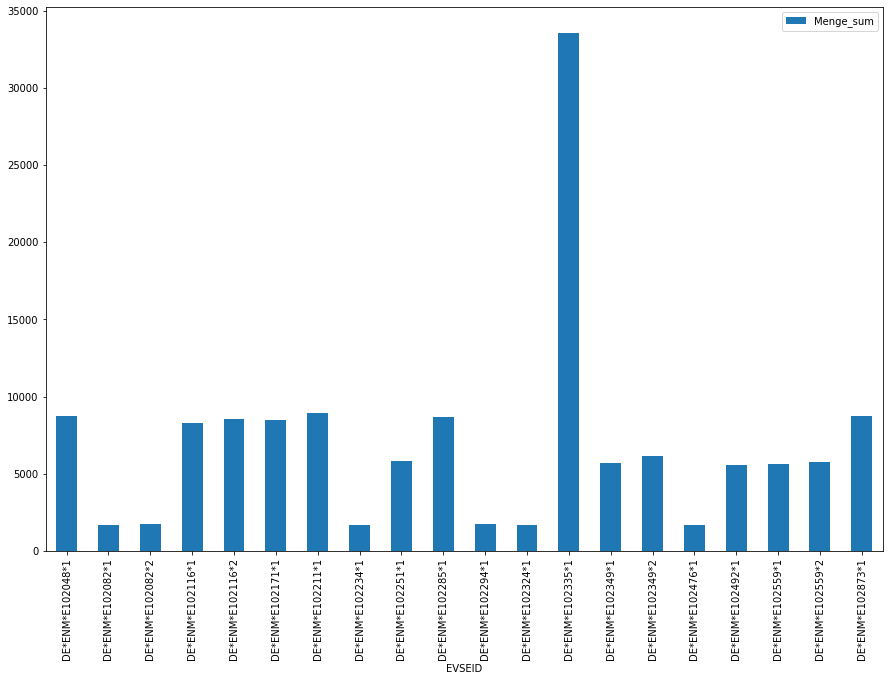

In [23]:
df_agg.plot.bar(by='EVSEID',y='Menge_sum',rot=90,figsize=(15,10))

Könnte dieser Unterschied zwischen den Ladpunkten mit den geringen Lademengen und dem mit der höchsten Menge vielleicht daran liegen, dass die Leistung (also die Menge, die in einer Stunde abgegeben werden kann) hier viel höher oder deutlich geringer ist, als bei den übrigen? _Wer sich die Zahlen angesehen hat, der wird natürlich gemerkt haben, dass diese Vermutung falsch ist, denn es haben an den Ladepunkten tatsächlich ja weniger Vorgägen stattgefunden. Die Anzahl der Datensätze pro Ladepunkt haben wir ob in diversen Auswertungen ja schon gesehen._

Über eine Schleifenkonstruktion können wir jede Dauer von Sekunden in Stunden umrechnen und errechnen, wieviele kWh pro Stunde bei den Ladevorgängen geliefert wurden. Da die Strommenge (in kWH) geteilt durch die Zeit (in Stunden) die abgegebene Leistung (in kW) ist, nennen wir die neue Spalte "Leistung".

In [24]:
df['Leistung'] = [(df.loc[i].Menge / df.loc[i].Dauer.seconds*3600).astype(float) for i in df.index]

Sehen wir uns zur Abwechslung einmal das Ende der Einträge im Dataframe an. Da die neuen Spalten immer rechts angehängt werden, müssen wir einmal ganz nach rechts scrollen:

In [25]:
df.tail()

,ID,EVSEID,ZaehlerNr,Beginn,EndeLadung,EndeVorgang,ZStandBeginn,ZStandEnde,Adresse,LSTyp,ZTyp,Einbaudatum,Menge,Dauer,DauerBelegt,Leistung
2139,51332838,DE*ENM*E102873*1,3019977134,2022-04-10 07:03:27,2022-04-10 10:31:54,2022-04-10 11:04:54,8903.79,8942.01,Festplatz 12,H9-2,SI08/15,2019-11-04 00:00:00,38.22,0 days 03:28:27,0 days 04:01:27,11.001199
2702,6223835,DE*ENM*E102048*1,5695058486,2022-04-10 08:22:28,2022-04-10 12:11:30,2022-04-10 14:06:30,8888.76,8930.75,Bahnhofstrasse 4,H9-2,AB012A,2020-02-24 00:00:00,41.99,0 days 03:49:02,0 days 05:44:02,11.000146
390,17551948,DE*ENM*E102251*1,5864842502,2022-04-10 08:33:11,2022-04-10 12:03:48,2022-04-10 13:09:48,5928.00,5966.61,Festplatz 2,CCG2,SI08/15,2019-01-28 00:00:00,38.61,0 days 03:30:37,0 days 04:36:37,10.999130
795,2537209,DE*ENM*E102211*1,1448154324,2022-04-10 08:57:59,2022-04-10 10:51:03,2022-04-10 11:12:03,9098.73,9119.46,Rathausplatz 6,3p-005A,AB009A,2020-12-21 00:00:00,20.73,0 days 01:53:04,0 days 02:14:04,11.000590
4307,93077558,DE*ENM*E102211*1,1448154324,2022-04-10 13:45:27,2022-04-10 15:05:07,2022-04-10 15:24:07,9119.75,9134.36,Rathausplatz 6,3p-005A,AB009A,2020-12-21 00:00:00,14.61,0 days 01:19:40,0 days 01:38:40,11.003347


Bei den Ladevorgängen sehen wir, dass plausible Leistungswerte angezeigt werden. Allerdings haben wir aufgrund der Menge der Datenpunkte noch keinen Überblick über die Ladeleistungen aller Ladevorgänge. Dazu brauchen wir wieder die Statistik:

In [26]:
df.Leistung.describe()

count    4640.000000
mean       22.987397
std        27.140890
min         7.488134
25%        10.998591
50%        11.000349
75%        11.003670
max       128.179104
Name: Leistung, dtype: float64

Wir erkennen einen Mimimalwert von ca. 7.5kW und einen Maximalwert von ca. 127kW. Die 1., 2. und 3. Quartile (25%, Median und 75%) sind beinahe identisch: d.h. dass die meisten Ladevorgänge mit ca. 11kW durchgeführt wurden. Diejenigen von euch, die sich intensiver mit statistischen Verteilungen beschäftigt haben können diese Daten bestimmt noch besser interpretieren, als ich.

Wenn wir die Leistungen wieder pro Ladesäule aggregieren, dann wird eine Vermutung von oben bestätigt und wir sehen
* die überweigende Zahl der Ladesäulen hat eine Ladeleistung von 11kW erzielt
* 2 Ladesäulen haben eine max. Ladeleistung von 22kW 
* aber eine Ladesäule hat eine deutlich höhere Ladeleistung. Das ist tatsächliche die einzige Schnelladesäule, die ich in dem Modell abgebildet habe.


Die Vermutung, dass es aber 6 Ladesäulen mit einer deutlich geringeren Leistung gibt, wurde aber nicht bestätigt. Hier haben also tasächlich deutlich weniger Ladevorgänge stattgefunden.

Wir sehen auch
* an allen Ladesäulen hat mindestens ein Ladevorgang mit ca.7.5kW stattgefunden: das ist die typische Ladeleistung einiger Plug-in Hybriden. Diese können aber nicht an einer Schnelladesäule geladen werden. Eine Ladeleistung von 11kW ist typisch für die meisten reinen Elektroautos an einer Wechselstrom-Ladesäule, während eine Ladeleistung von 22kW nur ganz wenige Fahrzeuge ermöglichen. Bei einer Schnelladesäule sind in der Praxis Ladeleistungen mit einem Peak bis 250kW erreichbar, wobei die Leistung über eine längere Ladedauer aber deutlich tiefer ist. Daher ergibt sich an den Schnelladesäulen kein so deutliches Bild.

In [27]:
df_Leistung_agg = df.groupby(by='EVSEID').agg({'Leistung':['min','max','mean','std','count']}) #lambda x: np.percentile(x,[50])]})
df_Leistung_agg.columns = df_Leistung_agg.columns.get_level_values(0)+"_"+df_Leistung_agg.columns.get_level_values(1)
df_Leistung_agg.sort_values('Leistung_max', ascending=False)

,Leistung_min,Leistung_max,Leistung_mean,Leistung_std,Leistung_count
EVSEID,,,,,
DE*ENM*E102335*1,38.596830,128.179104,80.166734,14.603191,815
DE*ENM*E102349*2,7.488134,22.027855,11.874547,3.518494,306
DE*ENM*E102349*1,7.494361,22.021277,11.564610,3.279566,294
DE*ENM*E102251*1,7.496203,11.026178,10.648052,1.055384,288
DE*ENM*E102492*1,7.493562,11.022801,10.652434,1.048943,292
DE*ENM*E102559*1,7.495688,11.021918,10.652403,1.048473,282
DE*ENM*E102559*2,7.494382,11.017857,10.720072,0.950293,288
DE*ENM*E102476*1,7.496927,11.010377,10.787799,0.841763,66
DE*ENM*E102082*2,7.498825,11.009917,10.569088,1.158359,65


Da wir die eine Ladesäule als Schnelladesäule identifziert haben, werfen wir diese aus dem aggregierten Dataframe raus und betrachten im weiteren nur noch die übrigen Wechselstrom-Ladepunkte. 

In [ ]:
df_Leistung_agg = df_Leistung_agg.drop('DE*ENM*E102335*1')

In [ ]:
df_Leistung_agg.describe()

In [ ]:
df_Leistung_agg.boxplot(column=['Leistung_mean','Leistung_max'],by='EVSEID',figsize=(15,10),rot=90)

#df_Leistung_agg.plot.bar(by='EVSEID',y=['Leistung_mean'],rot=90,figsize=(15,10))

In [ ]:
df.index= df['ID']

In [ ]:
df.drop('ID', axis = 1)

In [ ]:
help(df.boxplot)

In [ ]:
dw_mapping={0:'Montag',1:'Dienstag',2:'Mittwoch',3:'Donnerstag',4:'Freitag',5:'Samstag',6:'Sonntag'}
df['Tag'] = df['Beginn'].dt.dayofweek #.map(dw_mapping)
df.sort_values('Tag',ascending=True,inplace=True)
#df.index=['Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag','Sonntag']
#df['WTag']=df['Tag'].map(dw_mapping)

In [ ]:
aggregiert = df.groupby(by='Tag').agg({'Menge':['sum','mean']})

In [ ]:
aggregiert.plot.bar(figsize=(15,10))

In [ ]:
aggregiert = df.groupby(by=['EVSEID','Tag']).agg({'Menge':['sum','mean']})
aggregiert.columns = aggregiert.columns.get_level_values(0)+"_"+aggregiert.columns.get_level_values(1)

print(aggregiert)

In [ ]:
aggregiert.Menge_sum.plot.bar(figsize=(25,10))

In [ ]:
aggregiert.Menge_mean.plot.bar(figsize=(25,10))

In [ ]:
help(df.plot.bar)

In [ ]:
aggregiert.boxplot(column=['Menge_sum','Menge_mean'],by='Tag',figsize=(15,10))
#aggregiert.boxplot(column=['Menge_mean'],by='Tag',figsize=(15,10))

In [ ]:
np.random.seed(2345)
df = pd.DataFrame(np.random.randn(20,4),
                  columns=['C1', 'C2', 'C3', 'C4'])
#df = pd.DataFrame(np.random.uniform(0,1,80).reshape(20,4),
#                  columns=['C1', 'C2', 'C3', 'C4'])

df.describe()

In [ ]:
boxplot = df.boxplot(column=['C1', 'C2', 'C3'])